# Consumer Behavior Predictive Model

### This project involves analyzing and predicting consumer behavior using the "Consumer Behavior and Shopping Habits Dataset" from Kaggle. The goal is to clean and preprocess the data, perform statistical analysis to uncover patterns and insights, and build a predictive model using either scikit-learn or TensorFlow to forecast consumer shopping habits and preferences.

In [10]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Example: Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Example: Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import os

ValueError: could not convert string to float: 'No'

In [8]:
current_path = os.getcwd()
print(current_path)

/home/jovyan/Behavioral-Predictive-Model


In [2]:
# read in the dataset
consumer_dataset = pd.read_csv("/home/jovyan/Behavioral-Predictive-Model/shopping_behavior_updated.csv")

## Inspecting Consumer Dataset 

In [10]:
consumer_dataset.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [11]:
consumer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [12]:
# check for null values
null_values = consumer_dataset.isnull().sum()
null_values

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [13]:
# check each variables data types
consumer_dataset.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [14]:
#get stats
consumer_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [15]:
# check the values for each variable
for variable in consumer_dataset:
    print(variable)
    print(consumer_dataset[variable].sort_values().unique())
    print("")


Customer ID
[   1    2    3 ... 3898 3899 3900]

Age
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70]

Gender
['Female' 'Male']

Item Purchased
['Backpack' 'Belt' 'Blouse' 'Boots' 'Coat' 'Dress' 'Gloves' 'Handbag'
 'Hat' 'Hoodie' 'Jacket' 'Jeans' 'Jewelry' 'Pants' 'Sandals' 'Scarf'
 'Shirt' 'Shoes' 'Shorts' 'Skirt' 'Sneakers' 'Socks' 'Sunglasses'
 'Sweater' 'T-shirt']

Category
['Accessories' 'Clothing' 'Footwear' 'Outerwear']

Purchase Amount (USD)
[ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100]

Location
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' '

## Visualizations and Exploratory Data Analysis

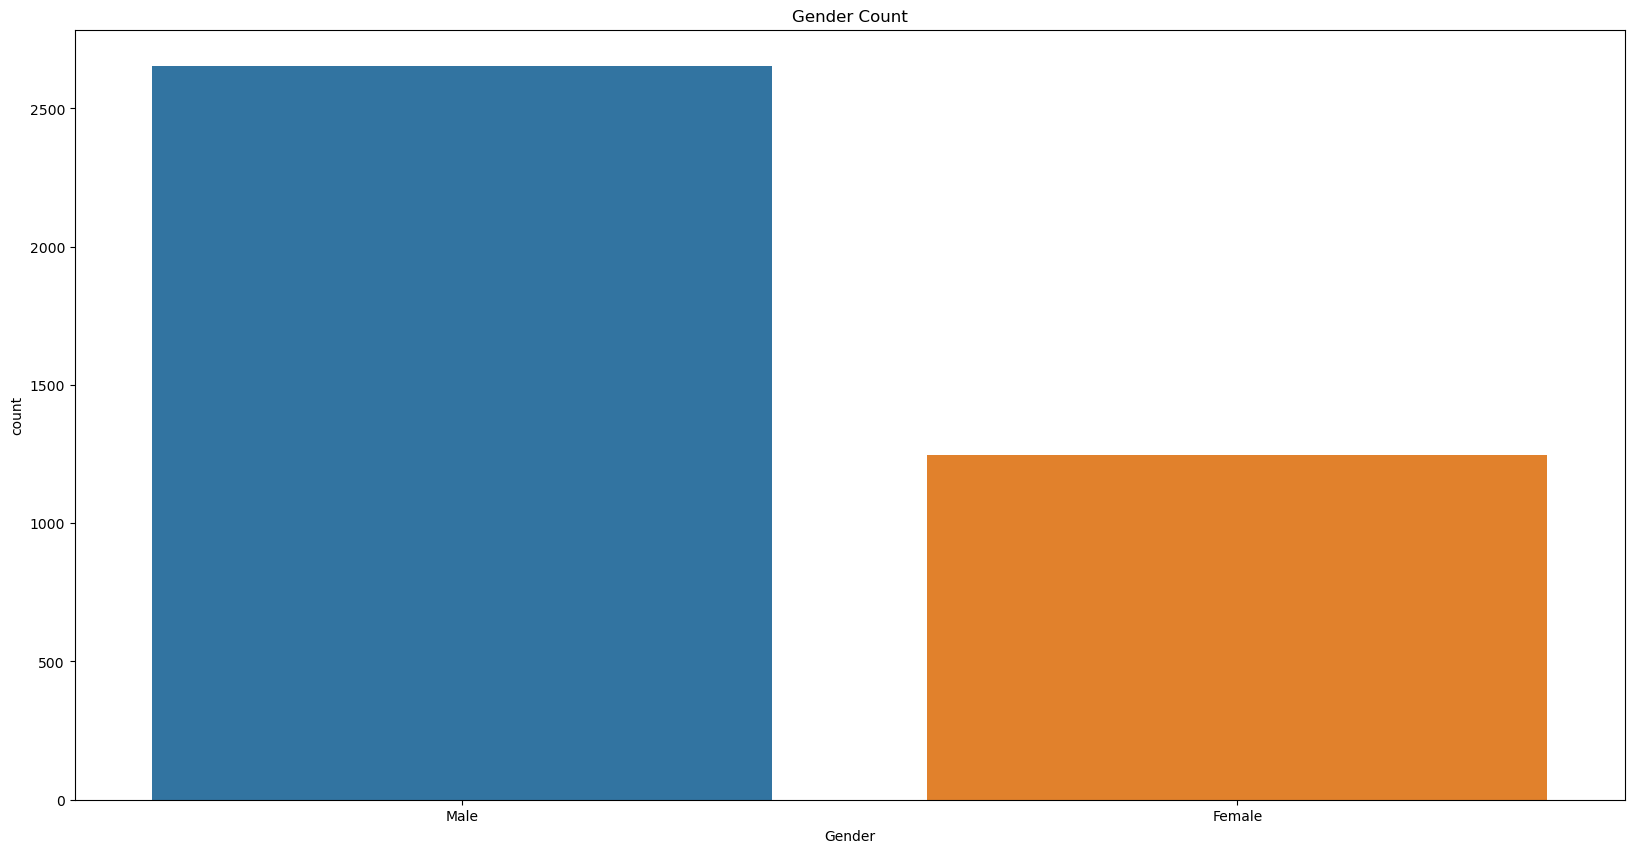

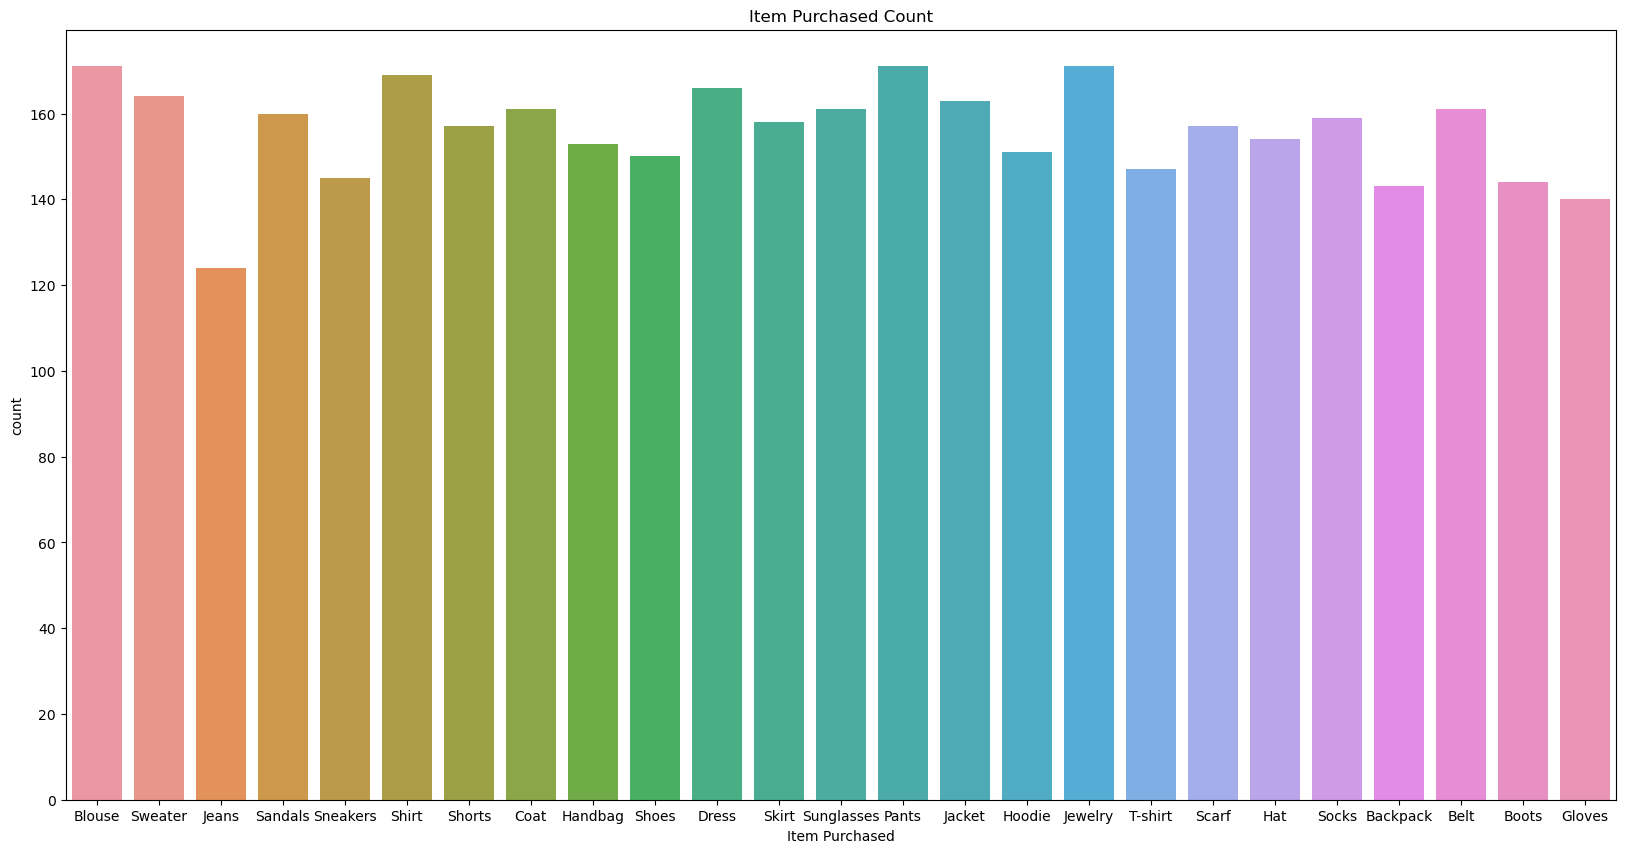

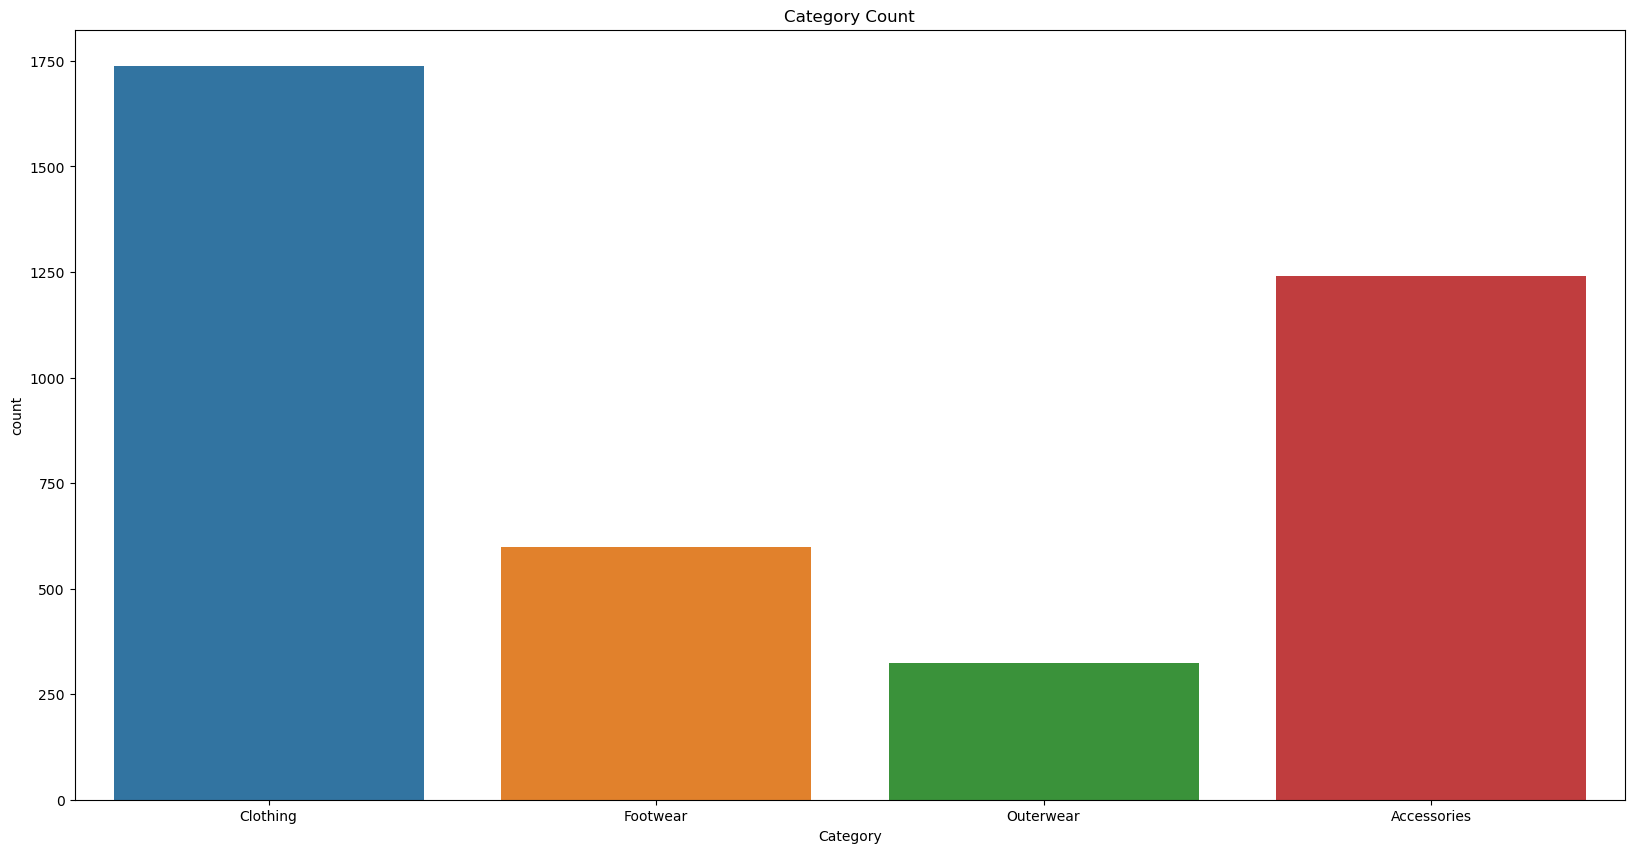

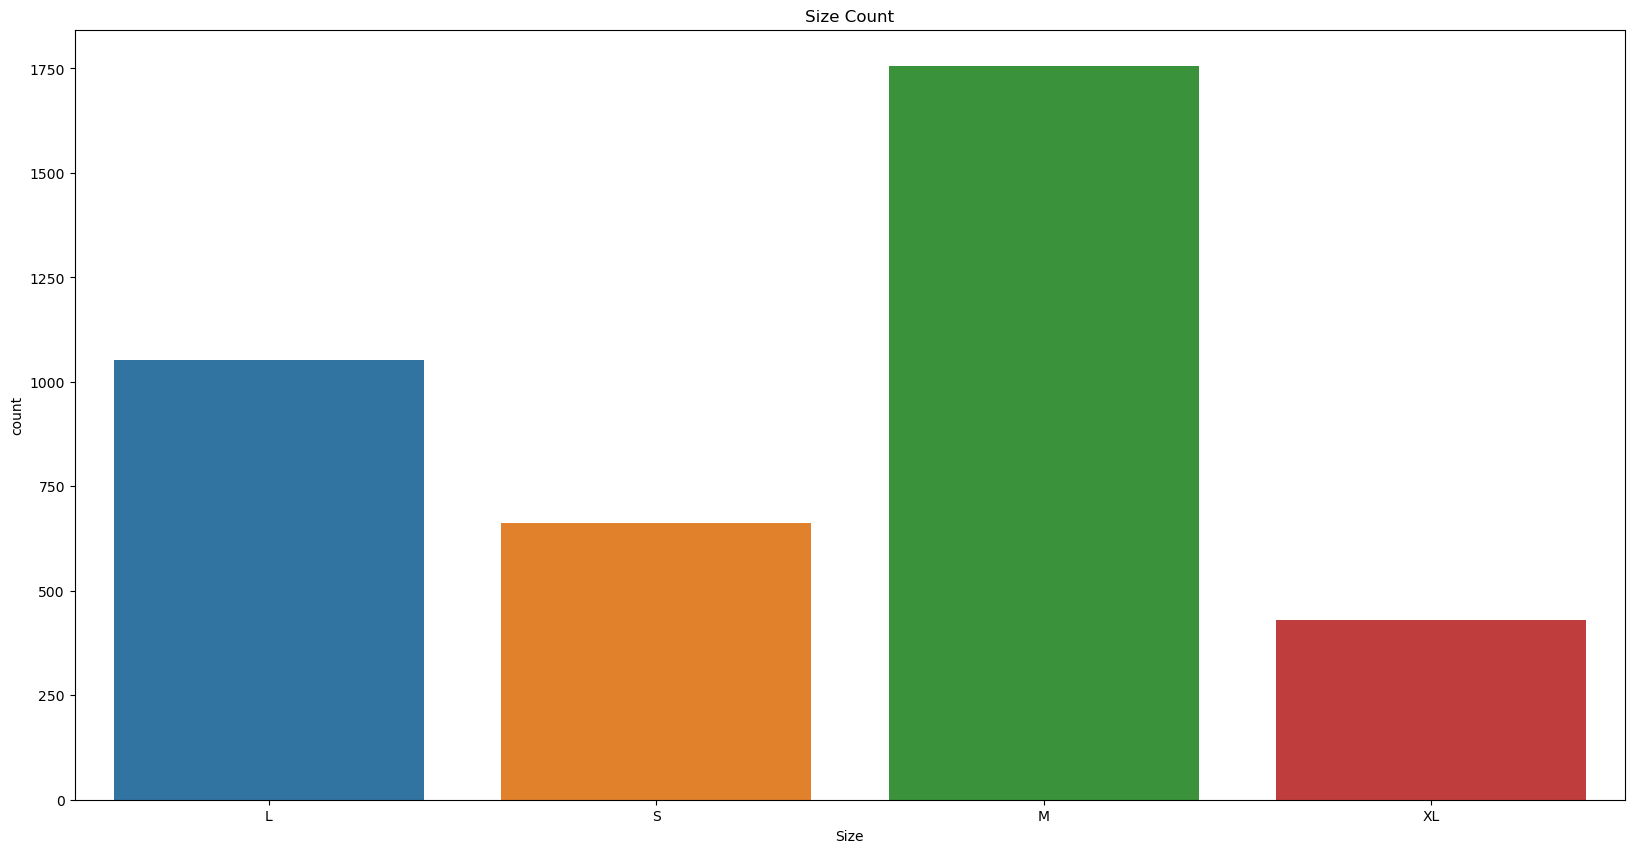

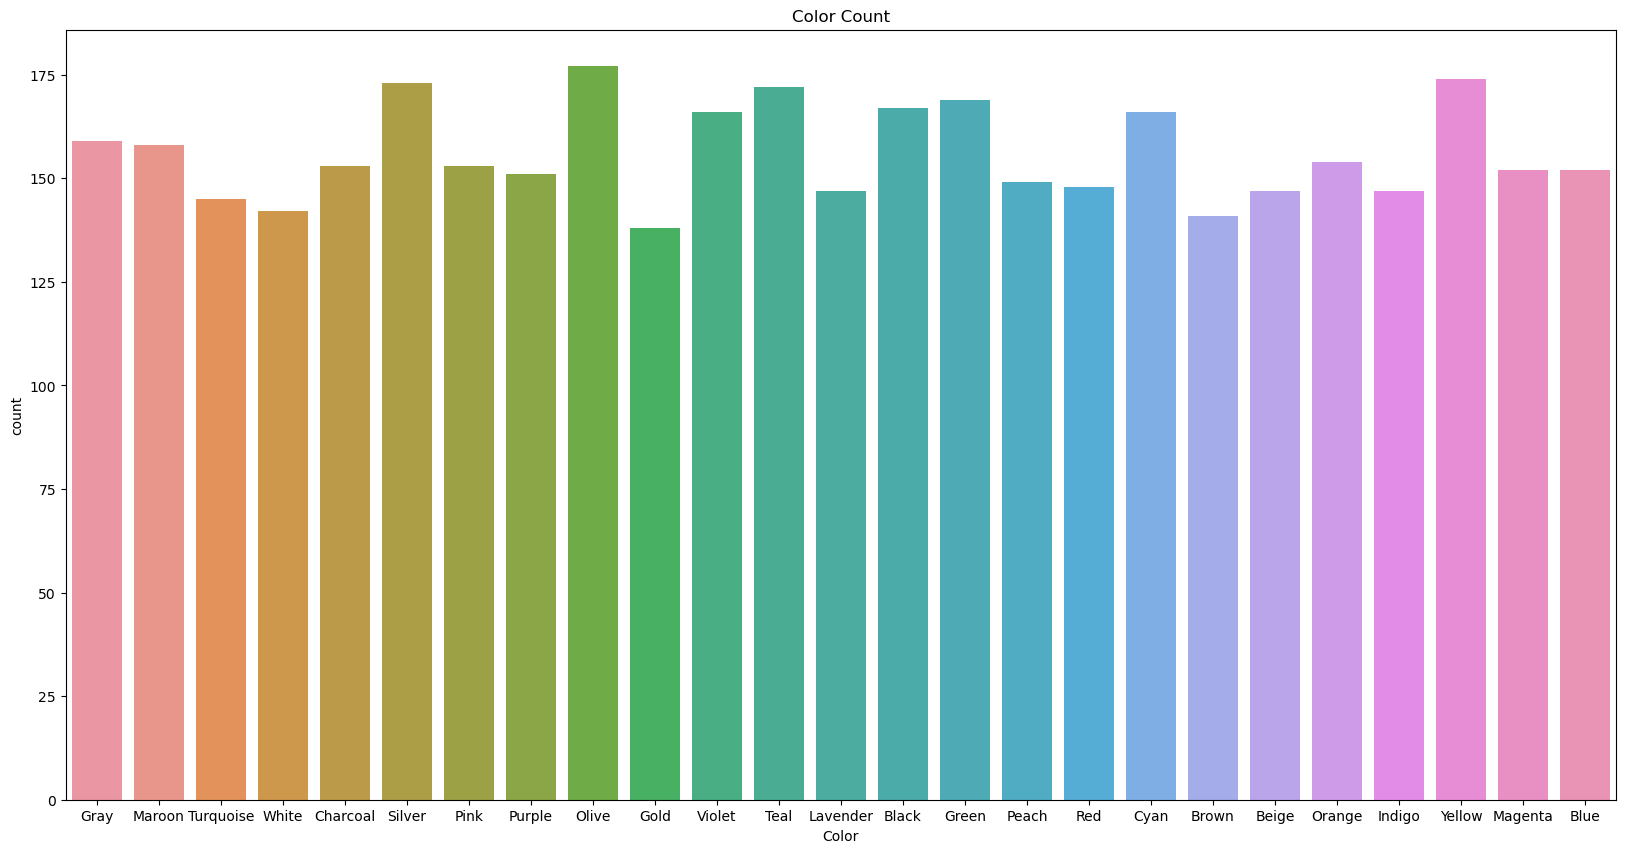

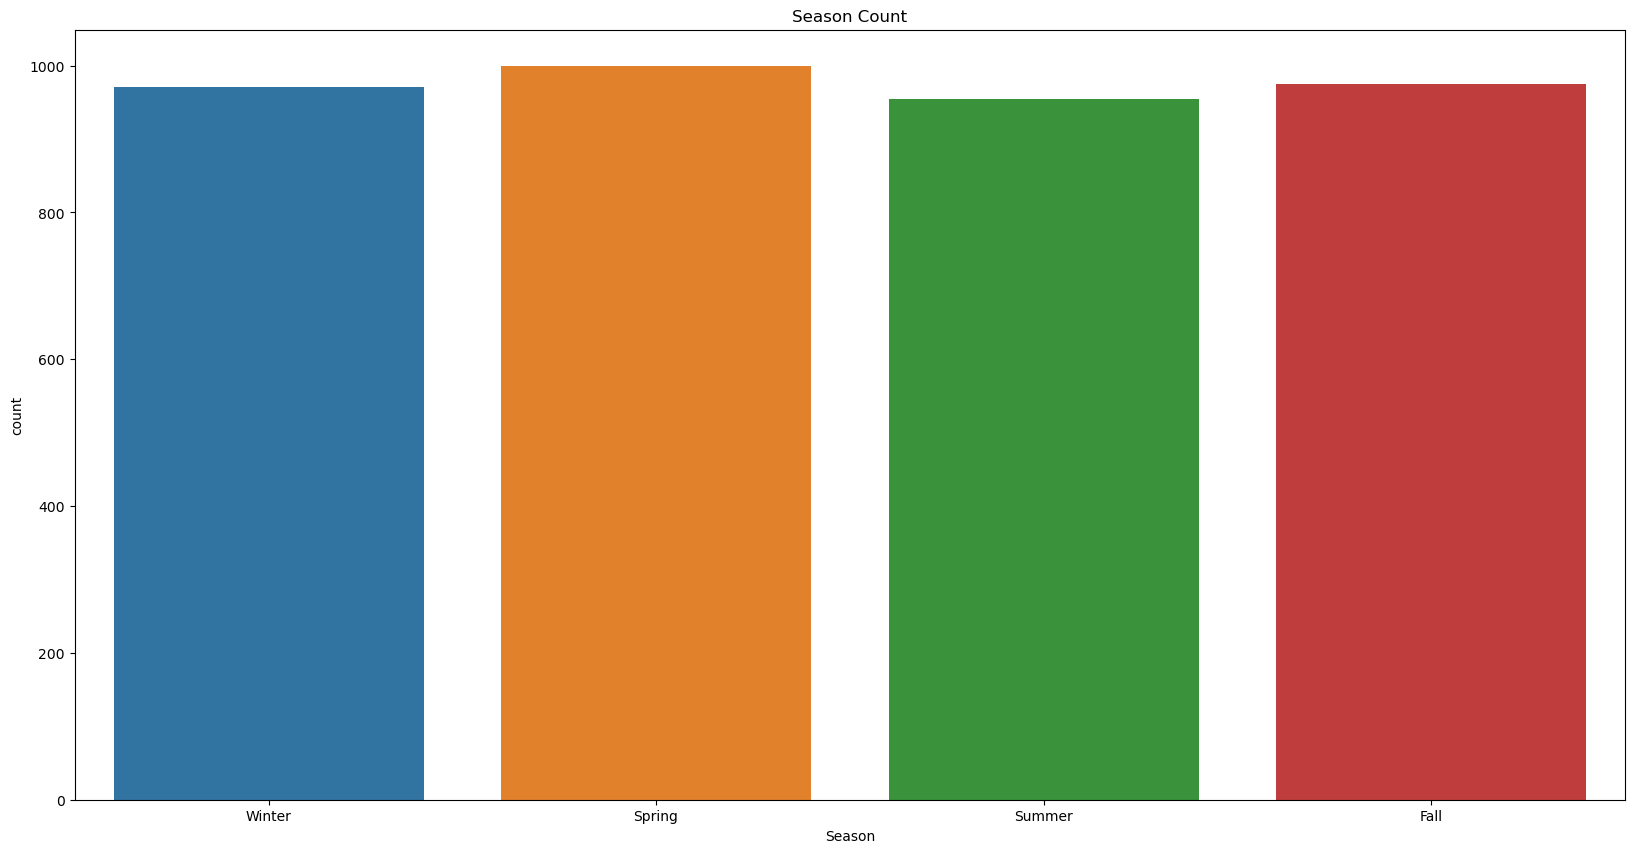

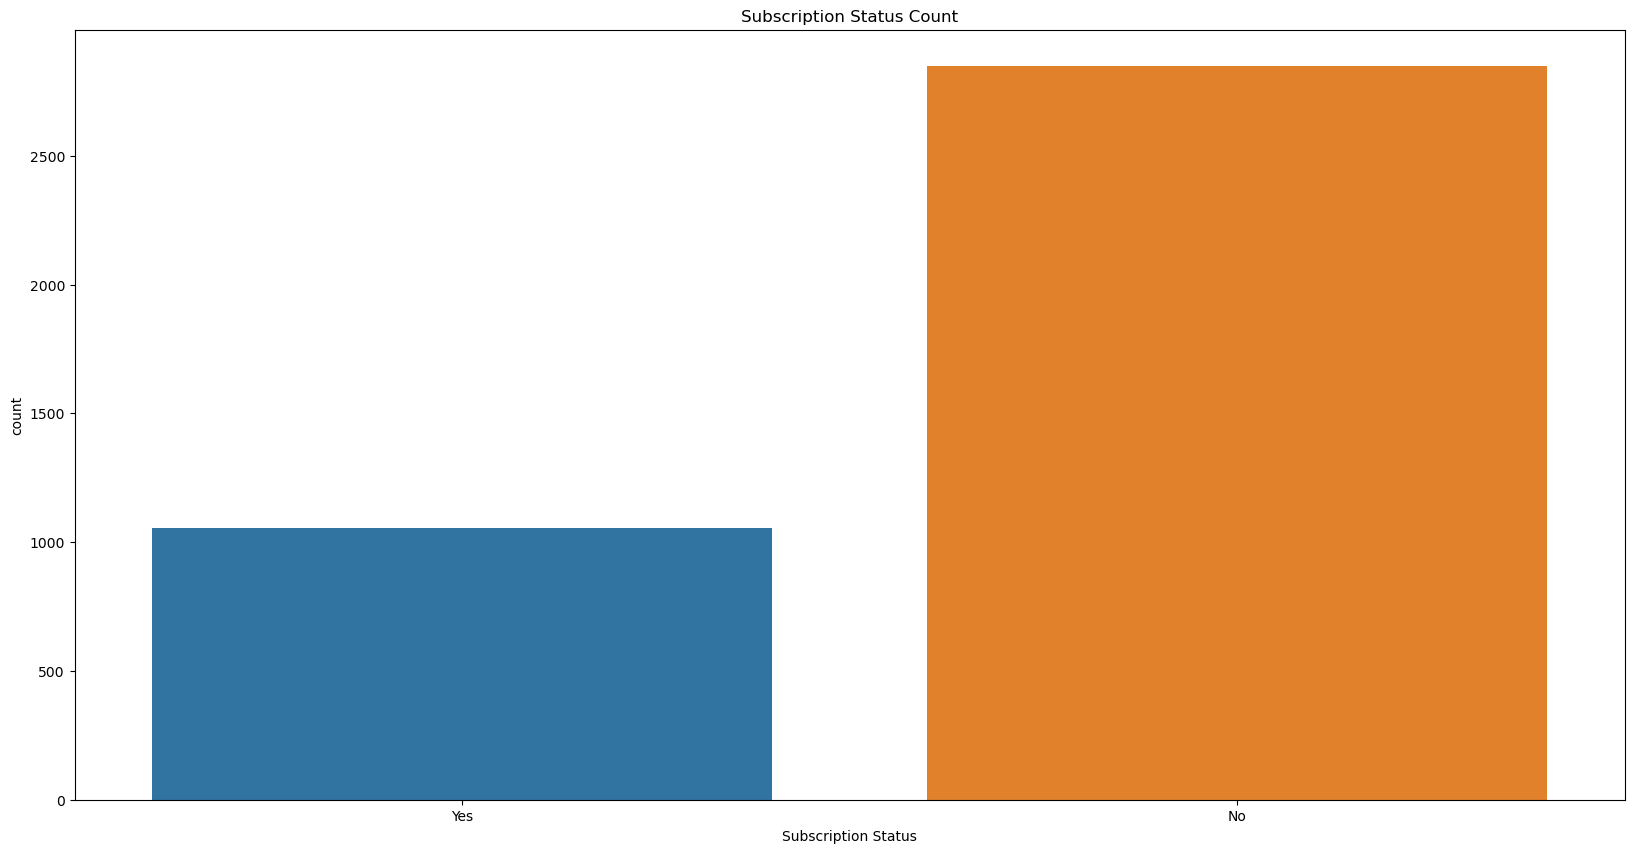

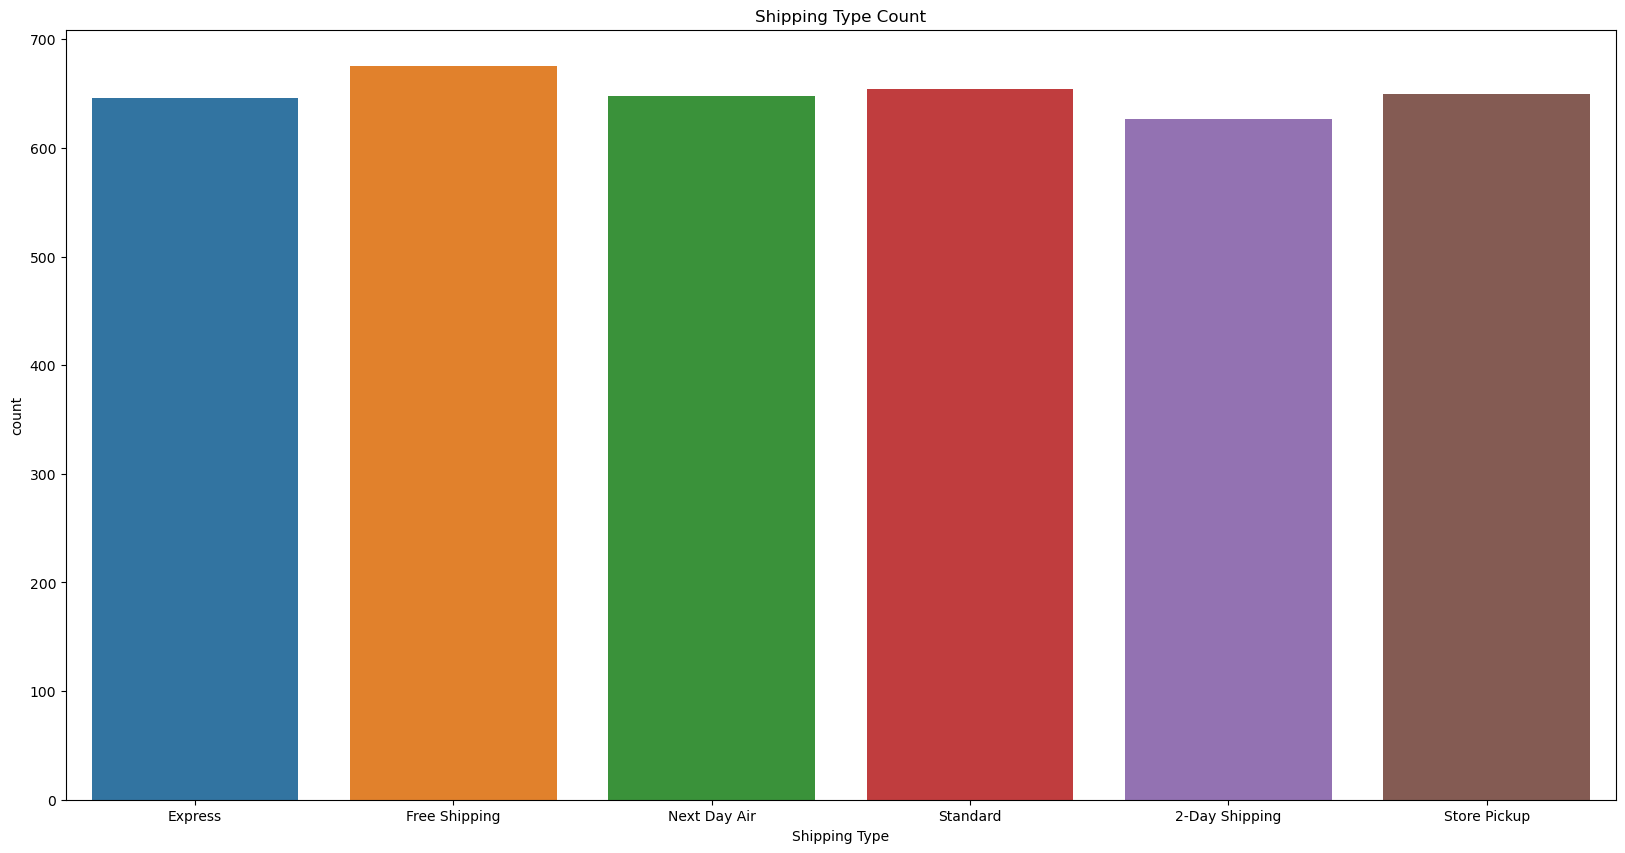

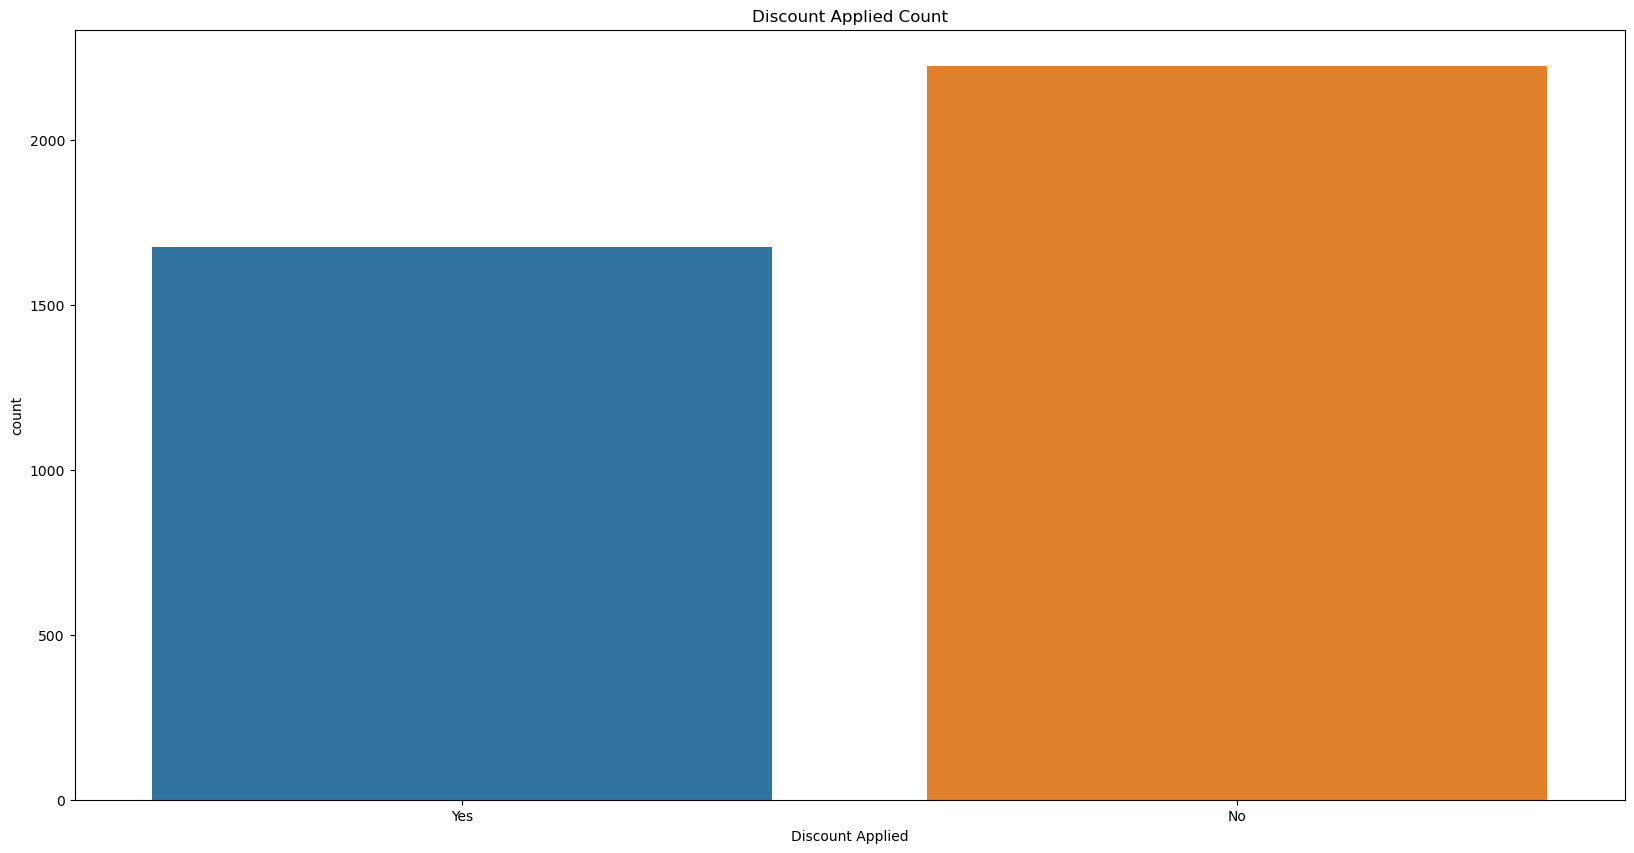

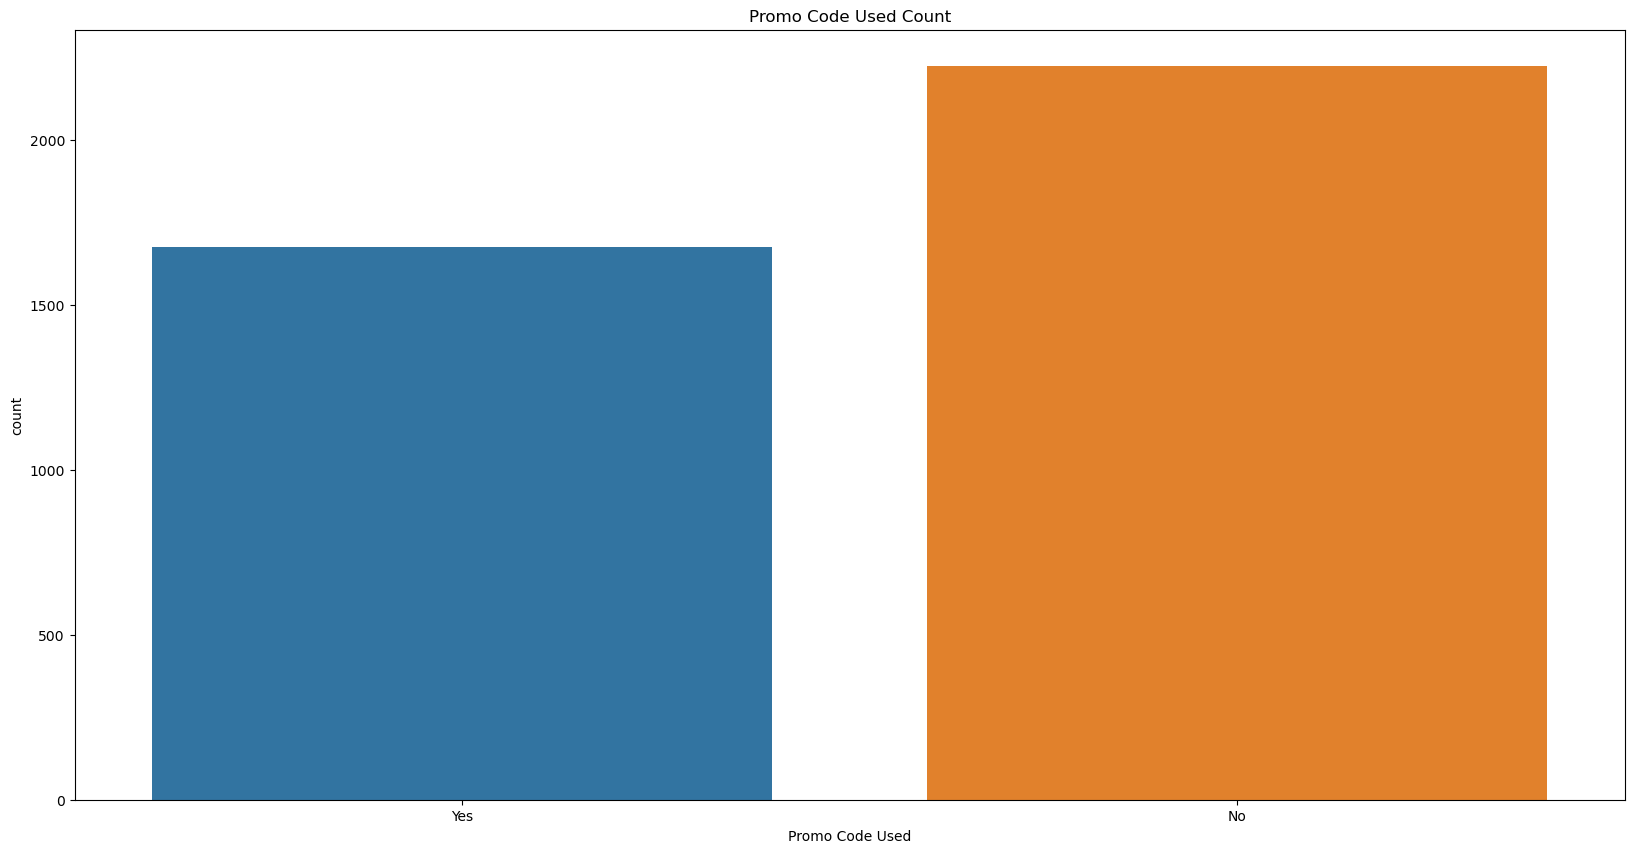

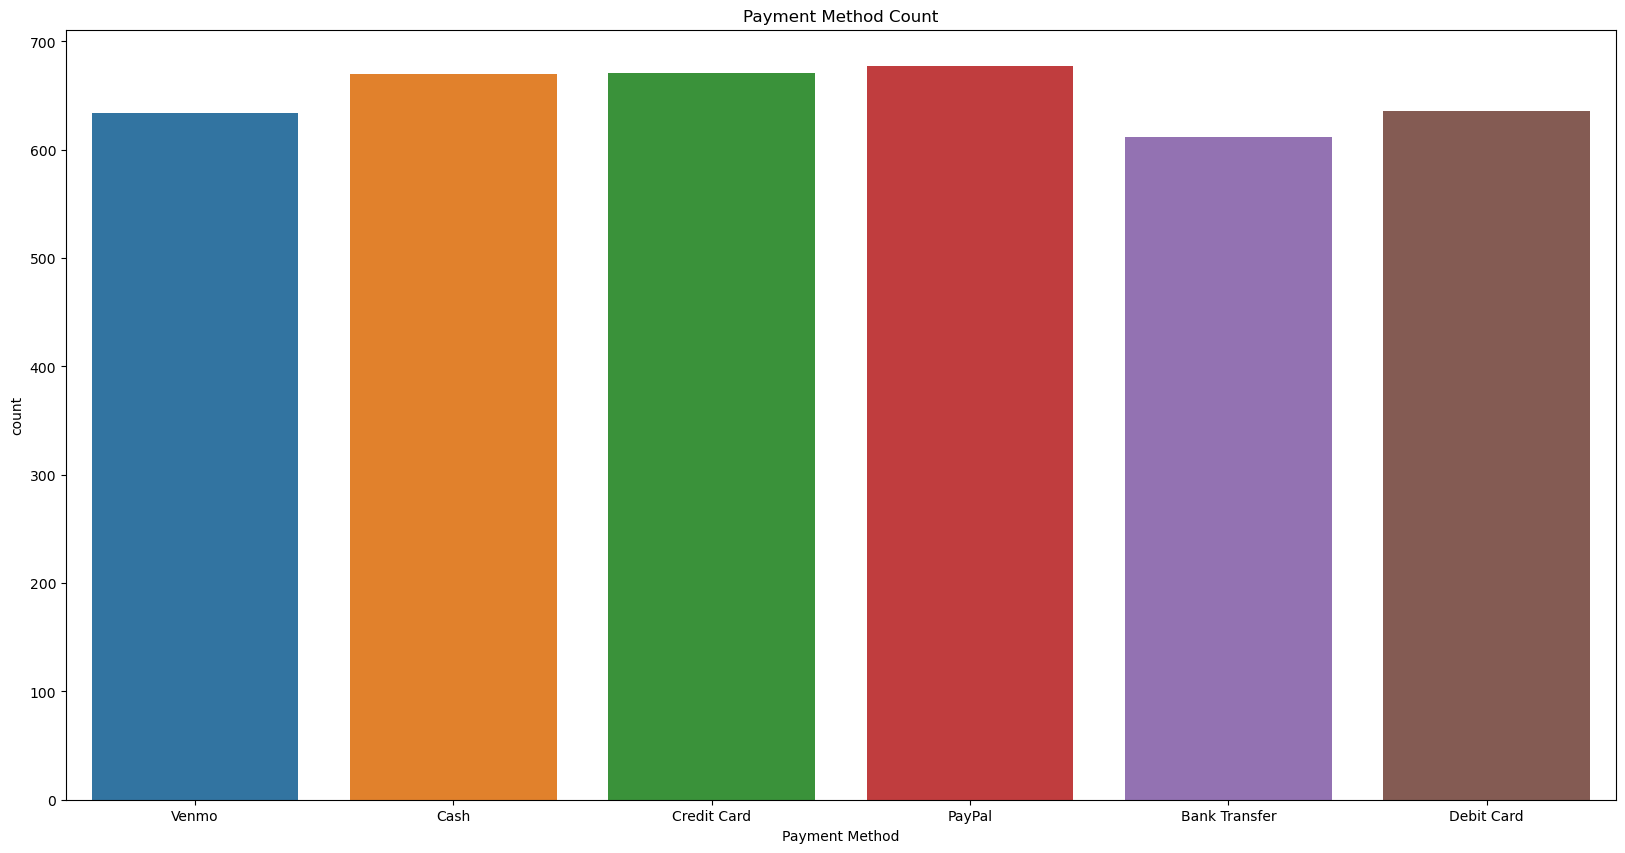

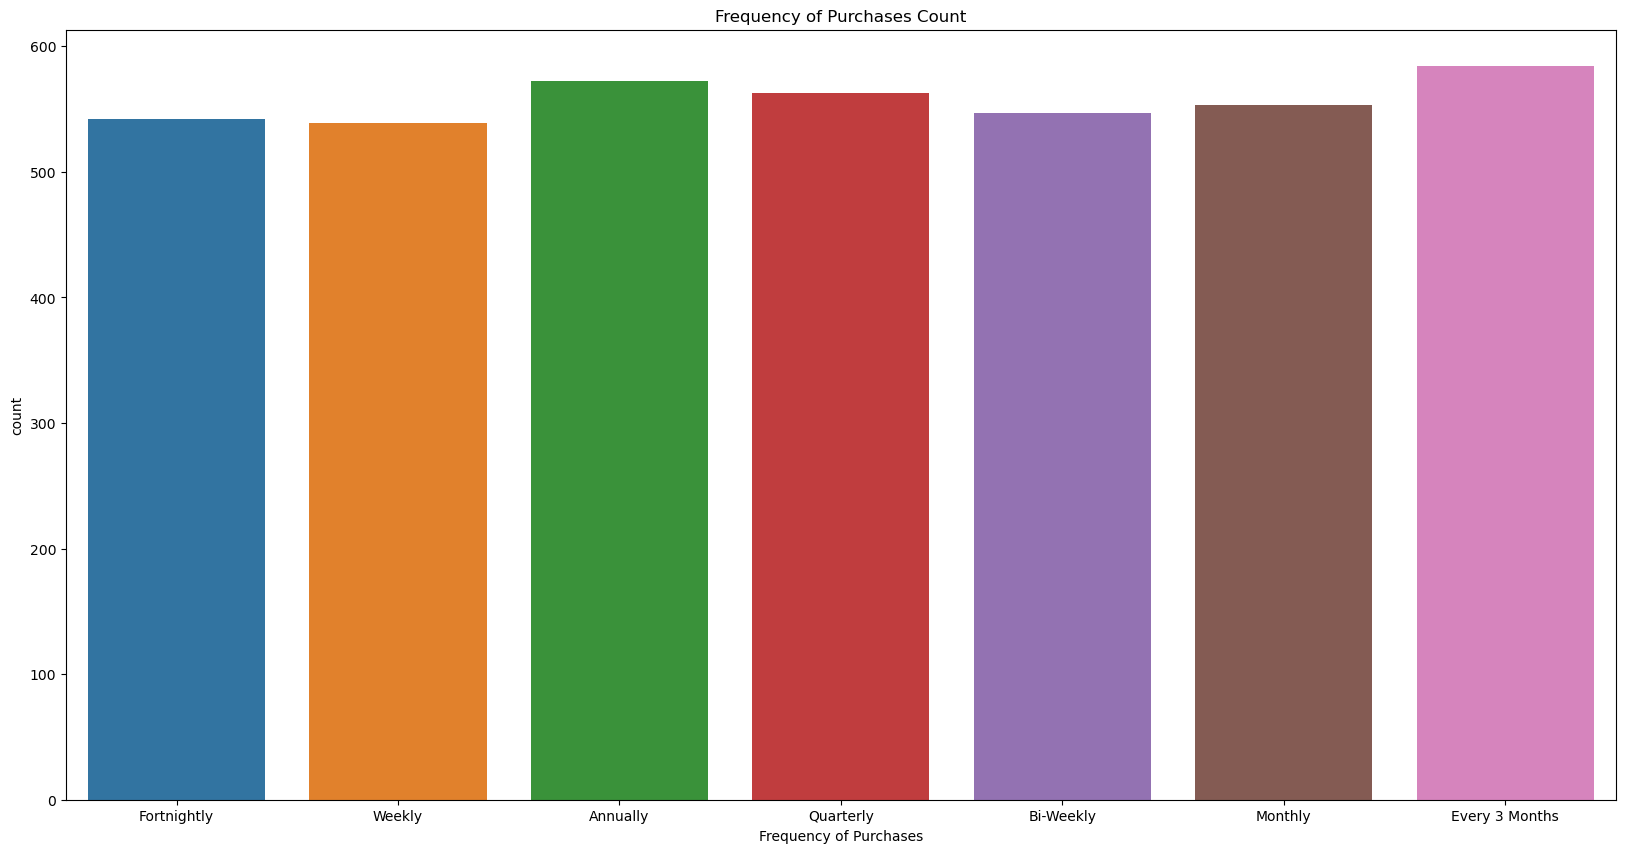

In [16]:
#plot all the categorical variables in a bar plot to show the counts of each
for variable in consumer_dataset:
    # too many locations to present nicely on a bar plot
    if consumer_dataset[variable].dtype == "object" and variable != 'Location':
        plt.figure(figsize = (20, 10))
        sns.countplot(x=variable, data=consumer_dataset)
        plt.title(f'{variable} Count')
        plt.show()

So far the bar plots show us that there is a skew toward male customers which we will have to be mindful of when creating the models.

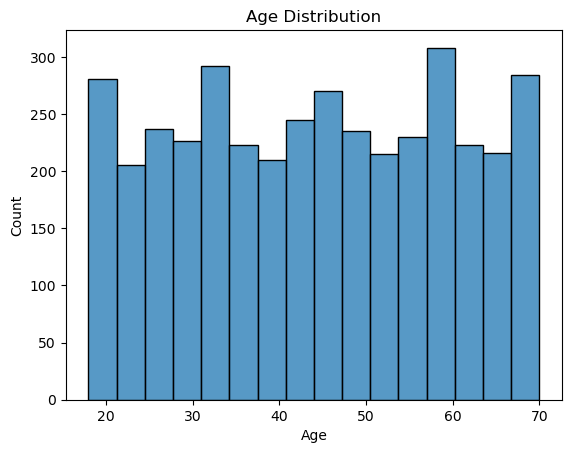

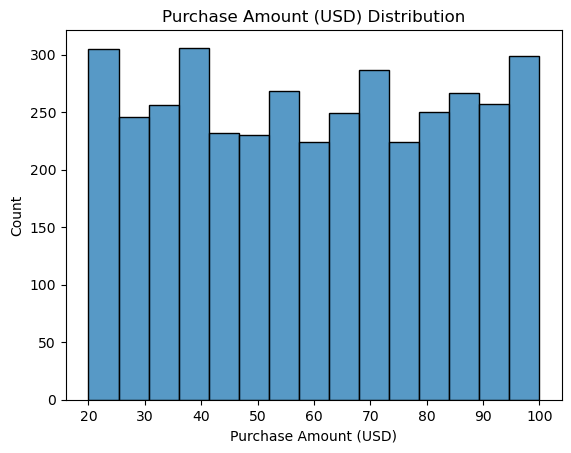

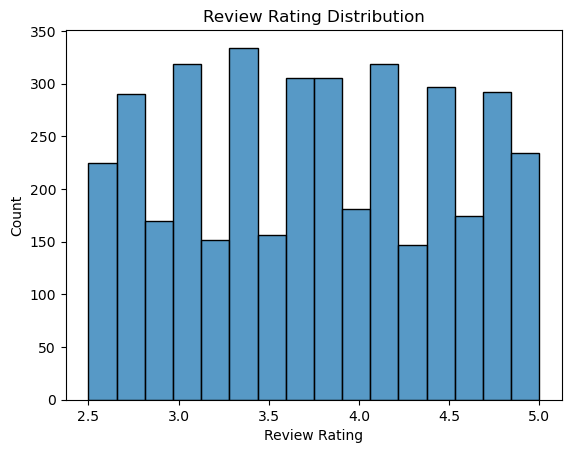

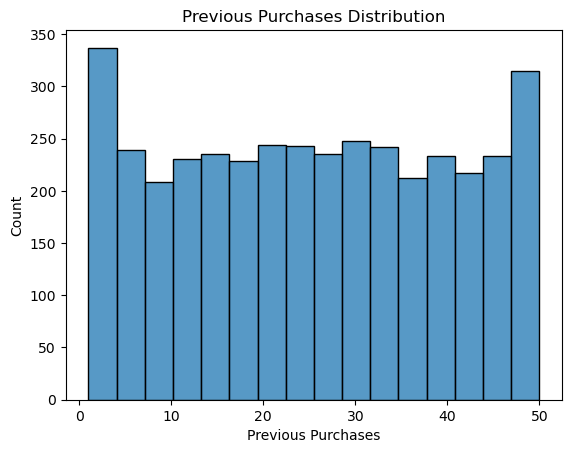

In [17]:
#plot all the numerical variables as a histogram
for variable in consumer_dataset:
    #customer ids are unique so it wouldn't make sense to plot them
    if consumer_dataset[variable].dtype != 'object' and variable != 'Customer ID':
        sns.histplot(x= variable, data = consumer_dataset)
        plt.title(f'{variable} Distribution')
        plt.show()

The histograms show us that there is not a particular skew in any numerical category. This will be helpful when creating the model since it will not have bias toward these categories, especially with age.

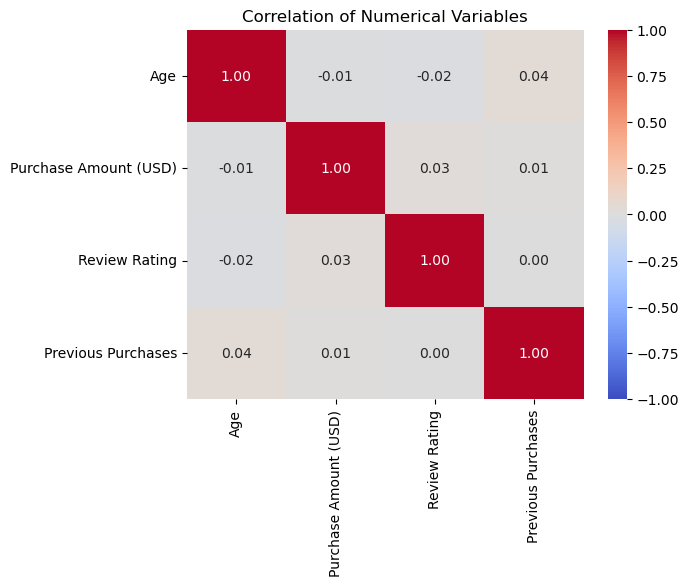

In [18]:
#analyze correlation between categorical data using pair plots
numerical_vars = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
correlation_matrix = consumer_dataset[numerical_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin =-1, vmax = 1)
plt.title("Correlation of Numerical Variables")
plt.show()


In [19]:
consumer_dataset.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [20]:
# converting objects to categories for modeling
for variable in consumer_dataset.columns:
    if consumer_dataset[variable].dtype == 'object':
        print(f"Converting column: {variable}")
        consumer_dataset[variable] = consumer_dataset[variable].astype('category').cat.codes

Converting column: Gender
Converting column: Item Purchased
Converting column: Category
Converting column: Location
Converting column: Size
Converting column: Color
Converting column: Season
Converting column: Subscription Status
Converting column: Shipping Type
Converting column: Discount Applied
Converting column: Promo Code Used
Converting column: Payment Method
Converting column: Frequency of Purchases


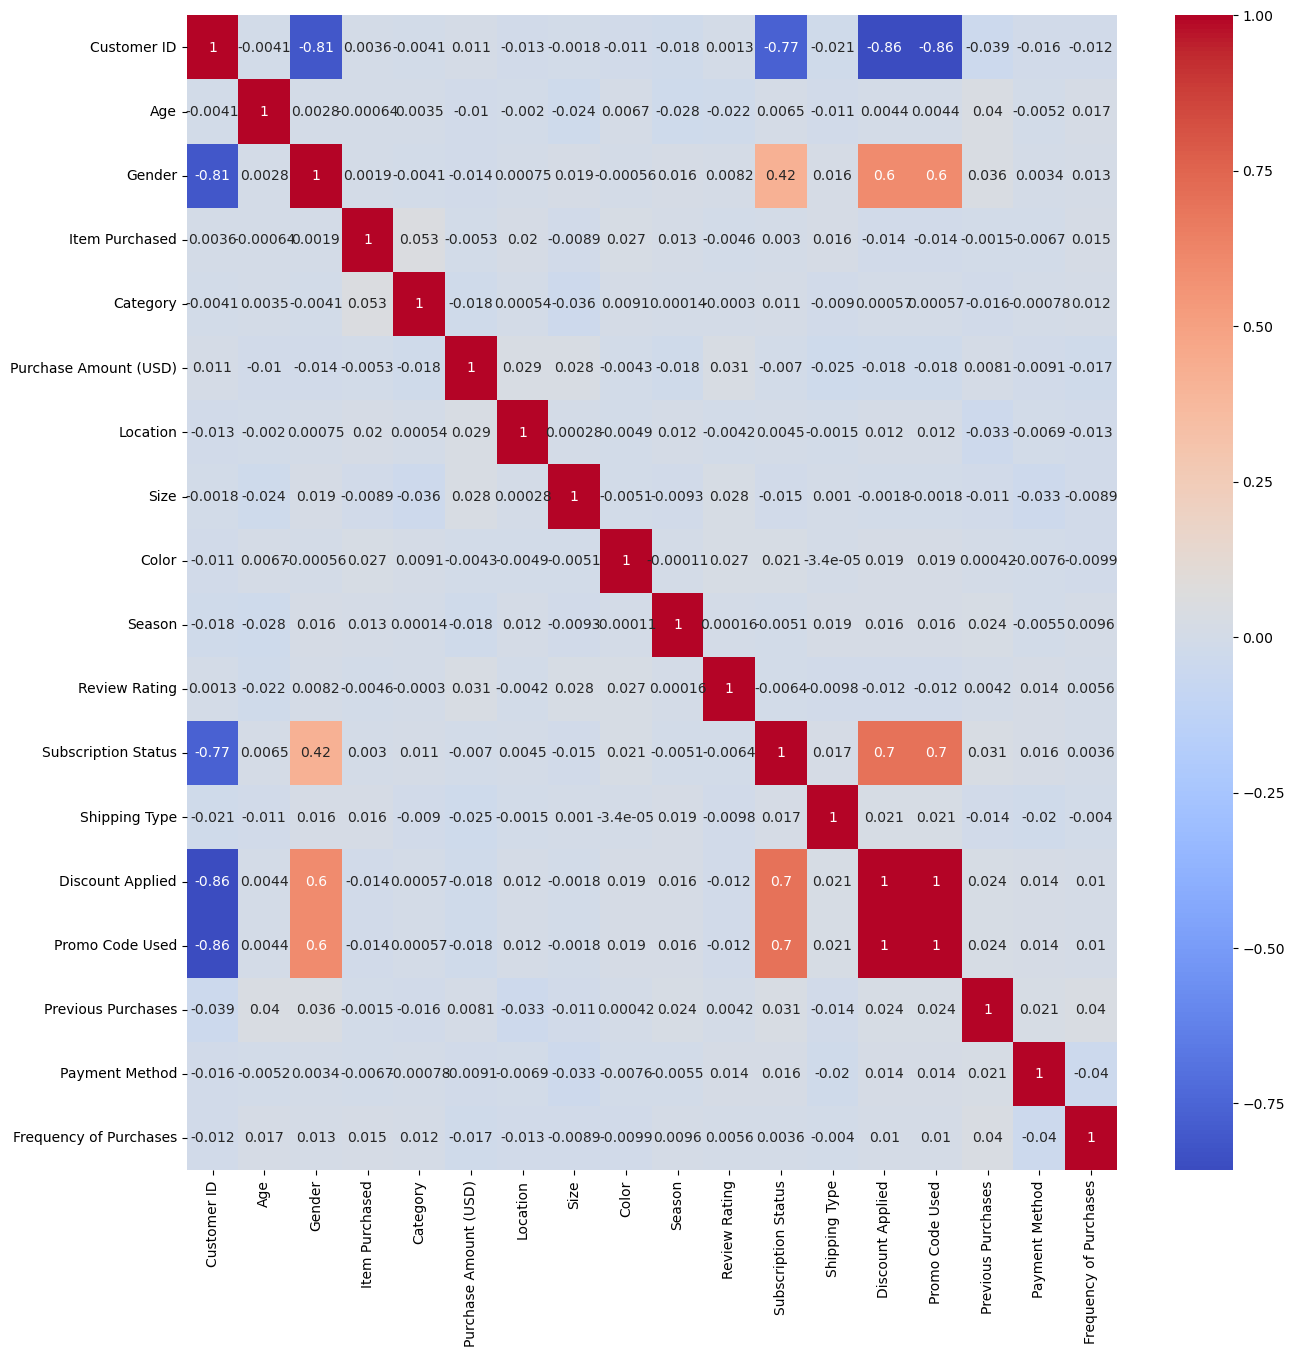

In [21]:
#let's now redo this correlation matrix with all the variables
correlation_matrix2 = consumer_dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix2,annot = True,cmap='coolwarm')
plt.show()

### Moderate to Strong Correlations

1. **Customer ID**
   - **Gender:** -0.81 (strong negative)
   - **Subscription Status:** -0.77 (strong negative)
   - **Discount Applied:** -0.86 (strong negative)
   - **Promo Code Used:** -0.86 (strong negative)

2. **Gender**
   - **Subscription Status:** 0.42 (moderate positive)
   - **Discount Applied:** 0.60 (moderate to strong positive)
   - **Promo Code Used:** 0.60 (moderate to strong positive)

3. **Subscription Status**
   - **Discount Applied:** 0.70 (strong positive)
   - **Promo Code Used:** 0.70 (strong positive)

4. **Discount Applied**
   - **Promo Code Used:** 1.00 (perfect positive)

5. **Promo Code Used**
   - **Discount Applied:** 1.00 (perfect positive)


## Customer Demographics:

- Gender Influence: Strong negative correlation with Customer ID indicates potential biases in customer targeting. Gender may impact Subscription Status, suggesting targeted marketing could be effective.

- Discounts and Promotions:
    - Effectiveness: Strong negative correlations between Customer ID and both Discount Applied and Promo Code Used indicate certain customers are more price-sensitive.
    - Interdependence: Perfect positive correlation between Discount Applied and Promo Code Used suggests customers frequently use both, which can enhance sales.
    
- Marketing Strategies:
    - Targeted Promotions: Focus on subscribers with discounts and promo codes, as they are likely to respond positively.
    - Gender-Based Promotions: Tailor marketing efforts based on gender, leveraging insights from the correlation with subscription behavior.
    
- Data Integrity:
    - Customer ID Redundancy: High correlation with other features suggests it may not add predictive power. Focus on actionable features like discounts and promo codes.
    
- Future Analysis:
    - Investigate Causes: Explore reasons for strong correlations, especially regarding gender and discount usage.
Segmentation: Use correlations to segment customers and analyze behaviors for more effective targeting.

## Predictive model ideas explored in order:
1. Predict the category of the item purchased (e.g., Backpack, Belt, etc.) based on customer features? -> Classification
2. Predict future purchase behavior based on historical data -> Regression 
3. Segment customers into groups based on their purchase behaviors and characteristics -> Clustering
4. Evaluate the effectiveness of discounts and promotions -> Classification
5. Estimate the total value a customer will bring over their lifetime -> Regression
6. Recommend products or offers based on customer preferences and behavior -> KNN

## Classification Models to predict whether a customer will make a purchase or not

**Target variable:** Purchase_Made (binary: 1 if the customer made a purchase, 0 if not)

**Features (variables) used**
- Age: Numeric (scaled)
- Gender: One-hot encoded (e.g., Gender_Female, Gender_Male)
- Location: One-hot encoded (e.g., Location_CityA, Location_CityB, etc.)
- Size: Numeric (encoded as numeric values)
- Color: One-hot encoded (e.g., Color_Red, Color_Blue, etc.)
- Season: One-hot encoded (e.g., Season_Summer, Season_Winter, etc.)
- Review Rating: Numeric (scaled)
- Subscription Status: Binary (1 for subscribed, 0 for not)
- Shipping Type: One-hot encoded (e.g., ShippingType_2-Day, ShippingType_Express, etc.)
- Discount Applied: Binary (1 if a discount was applied, 0 if not)
- Promo Code Used: Binary (1 if a promo code was used, 0 if not)
- Previous Purchases: Numeric (scaled or left as numeric)
- Payment Method: One-hot encoded (e.g., PaymentMethod_CreditCard, PaymentMethod_PayPal, etc.)
- Frequency of Purchases: Converted to numeric and scaled (e.g., frequencies encoded as 1, 2, etc.)

## Models to try in order:

1. Start with logistic regression to establish a baseline.
2. Move on to random forest for its customizability and flexibility.
3. Finally, experiment with XGBoost to potentially achieve the best performance.

In [30]:
# copy the dataset to create a new one to not alter the original
new_df = consumer_dataset.copy()

# drop customer ID as it is not a relevant feature
new_df = new_df.drop(columns=['Customer ID'])

# create the target variable: the category of the item purchased
# assuming 'Item Purchased' contains the item categories
new_df['Item_Category'] = new_df['Item Purchased']

# drop the original 'Item Purchased' column since it's no longer needed
new_df = new_df.drop(['Item Purchased'], axis=1)

# one-hot encoding for categorical variables
new_df = pd.get_dummies(new_df, columns=['Gender', 'Location', 'Size', 'Color', 'Season', 
                                          'Shipping Type', 'Payment Method', 'Subscription Status', 
                                          'Discount Applied', 'Promo Code Used', 'Frequency of Purchases', 'Category'])

# scale numerical features
numerical_cols = ['Age', 'Review Rating', 'Previous Purchases']
scaler = StandardScaler()
new_df[numerical_cols] = scaler.fit_transform(new_df[numerical_cols])

# display the first few rows of the updated dataframe
new_df.head()




,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Item_Category,Gender_Female,Gender_Male,Location_Alabama,Location_Alaska,Location_Arizona,...,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear
0,0.718913,53,-0.907584,-0.785831,Blouse,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,-1.648629,64,-0.907584,-1.616552,Sweater,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0.390088,73,-0.907584,-0.162789,Jeans,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,-1.517099,90,-0.349027,1.637107,Sandals,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.061263,49,-1.466141,0.391025,Blouse,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Logistic Regression Model as a baseline

In [32]:
# step 1: define the features and target variable
X = new_df.drop(columns=['Item_Category'])  # features
y = new_df['Item_Category']  # target variable



In [33]:
# step 2: split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# step 3: initialize and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [36]:
# step 4: make predictions
lr_predictions = lr_model.predict(X_test)

# step 5: evaluate the model
accuracy = accuracy_score(y_test, lr_predictions)
conf_matrix = confusion_matrix(y_test, lr_predictions)
class_report = classification_report(y_test, lr_predictions)

print(f'accuracy: {accuracy:.2f}')
print('confusion matrix:')
conf_matrix
print('classification report:')
class_report

accuracy: 0.14
confusion matrix:
classification report:


'              precision    recall  f1-score   support\n\n    Backpack       0.08      0.12      0.10        26\n        Belt       0.04      0.03      0.03        40\n      Blouse       0.17      0.21      0.19        33\n       Boots       0.25      0.14      0.18        36\n        Coat       0.43      0.48      0.45        31\n       Dress       0.06      0.06      0.06        31\n      Gloves       0.11      0.15      0.13        27\n     Handbag       0.11      0.06      0.08        34\n         Hat       0.03      0.03      0.03        36\n      Hoodie       0.12      0.12      0.12        24\n      Jacket       0.43      0.38      0.40        32\n       Jeans       0.00      0.00      0.00        28\n     Jewelry       0.13      0.18      0.15        28\n       Pants       0.14      0.11      0.12        36\n     Sandals       0.25      0.34      0.29        29\n       Scarf       0.00      0.00      0.00        24\n       Shirt       0.03      0.02      0.03        44\n       

# Yikes! Coats perfomed the best, but the score is pretty bad...

## Steps to Improve the Classification Model
1. Check for Class Imbalances: Investigate the number of examples for each category. If some categories have significantly fewer examples, consider fixing this by adding more examples (oversampling), removing some examples (undersampling), or creating new examples (using SMOTE).

2. Create New Features: Explore new features or transformations of existing features that might better capture relationships in the data.

3. Try Different Models: Experiment with different models, such as Random Forest or XGBoost, and adjust their settings to see if better results can be achieved.

4. Use Cross-Validation: Apply cross-validation to ensure that the performance metrics are reliable and not a result of overfitting.

5. Analyze Class-Specific Metrics: Examine confusion matrices to identify which classes are often confused with one another, providing insight into model struggles.

6. Adjust the Decision Threshold: If applicable, modify the decision threshold to optimize for precision or recall based on business needs.

In [38]:
# Display the columns of new_df
print(new_df.columns)


Index(['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases',
       'Item_Category', 'Gender_Female', 'Gender_Male', 'Location_Alabama',
       'Location_Alaska', 'Location_Arizona',
       ...
       'Frequency of Purchases_Bi-Weekly',
       'Frequency of Purchases_Every 3 Months',
       'Frequency of Purchases_Fortnightly', 'Frequency of Purchases_Monthly',
       'Frequency of Purchases_Quarterly', 'Frequency of Purchases_Weekly',
       'Category_Accessories', 'Category_Clothing', 'Category_Footwear',
       'Category_Outerwear'],
      dtype='object', length=119)


In [ ]:
##potentially remove location because it creates way too many columns...

## Predict future purchase behavior based on historical data.
Performing a linear regression model to predict the amount the customer will spend in their next purchase.

**Target variable**: Future purchase amount using Purchase Amount (USD)

**Features (variables) used:**
- Age
- Item Purchased
- Category
- Size
- Color
- Season
- Subscription Status
- Discount Applied or Promo Code Used (choose one based on evaluation)
- Previous Purchases
- Review Rating